# Predicting Character Alignment with Logistic Regression Using Pyspark from Scratch

## Introduction
In this analysis, we aim to utilize the comic book characters dataset to predict whether a Marvel or DC character is a hero, villain or is reformed using logistic regression, implemented from scratch. This dataset comprises of various character statistics such as their publisher, name, alignment, hair colour, eye colour and first appearance (to name a few). To shed light on the classification and prediction of comic book characters into the categories of hero, villain, or reformed, we turn to logistic regression. This statistical method offers a reliable means of making such predictions by analyzing various character attributes and characteristics. Through this predictive model, we aim to explore the underlying factors that distinguish these archetypes and offer valuable insights into the comic book narrative. Our objective is to provide a data-driven understanding of these iconic personas, contributing to the ever-evolving discourse surrounding the beloved characters that populate the comic book universe.

Logistic regression is a statistical technique used for binary classification, where the goal is to predict one of two possible outcomes based on input features. It models the probability of a specific outcome by transforming a linear combination of input features into a probability score between 0 and 1 using the logistic function. This method is valuable for a wide range of applications, such as predicting customer churn, medical diagnosis, or, in the context of classifying comic book characters, determining whether a character is a hero, villain, or reformed based on their attributes and characteristics.

## Dataset Source  
The dataset we will be using comes from Kaggle and can be found at https://www.kaggle.com/datasets/sujaykapadnis/comic-book-characters?select=week9_comic_characters.csv
It is a widely-used resource for Marvel and DC comic book characters, and is great for classification tasks. This dataset comprises a collection of character attributes and characteristics making it valuable for logistic regression. The dataset consists of 500 000 data entries, each contributing to characters within Marvel and DC comcis

The dataset contains the following columns:

* **Unnamed:** 0: A likely identifier for the rows, possibly an index or unique identifier for each character entry in the dataset.
* **Publisher:** The comic book publishing company that the character is associated with, such as Marvel or DC Comics.
* **Page_id:** A unique identifier or reference for the character's page in the comic book.
* **Name:** The name of the comic book character.
* **Urlslug:** A URL-friendly version of the character's name, often used for online references or web links.
* **Id:** An identifier for the character, which may be different from the name and could serve as a unique reference.
* **Align:** The alignment of the character, indicating whether they are a hero, villain, or neutral/reformed.
* **Eye:** The eye color of the character.
* **Hair:** The hair color of the character.
* **Sex:** The gender or sex of the character, typically male or female.
* **Gsm:** Gender or sexual orientation of the character, if relevant (such as LGBTQ+ representation).
* **Alive:** A binary indicator, likely denoting whether the character is alive (1) or deceased (0).
* **Appearances:** The number of appearances the character has made in comic books or related media.
* **First_appearance:** The comic book issue or media where the character first appeared.
* **Month:** The month of the character's first appearance.
* **Year:** The year of the character's first appearance.
* **Date:** The complete date of the character's first appearance, including day, month, and year.



## Why is this dataset appropriate
This comic book character dataset is a strong candidate for logistic regression for several compelling reasons. Firstly, it aligns perfectly with the binary classification task that logistic regression excels in, specifically, determining whether a character is a hero, villain, or reformed. The "align" column serves as a clear binary target variable, providing a solid foundation for creating a predictive model. Moreover, the dataset contains a diverse mix of both categorical and numeric features, ranging from the publisher and eye and hair color to gender, gender orientation, and even the character's number of appearances. Logistic regression is well-equipped to handle this variety of data types.

Moreover, logistic regression's simplicity and interpretability are advantageous for comic book character analysis. Its transparent results enable a clear understanding of the factors influencing character alignments, which is valuable to enthusiasts and researchers. The model's computational efficiency is also beneficial for analyses of varying scales, making it accessible without extensive computational resources. The dataset's historical dimension, represented by the first appearance date of each character, allows for insights into evolving character alignments over time, while the potential for feature engineering adds flexibility in generating new variables, enhancing the predictive power of the model.


## Analysis Plan
To analyze this dataset, we will perform the following steps:

1. Load and clean the data.

2. Perform exploratory data analysis to understand the distribution of the variables and any  
   duplicates or missing values.
   
3. Develop the Logistic Regression model.

5. Evaluate the performance of the model.

6. Display the model results graphically.

7. Recommend improvements to increase model accuracy.

We will use Pyspark as well as Python's extensive library for cleaning the data, developing the model and displaying the results graphically


### Loading and Analyzing the Data

In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler
import math

# Create a Spark session
spark = SparkSession.builder.appName("LogisticRegression").getOrCreate()

# Load the dataset 
df_pyspark= spark.read.csv("week9_comic_characters.csv", header=True, inferSchema=True)



In [2]:
# Shoe the first 20 rows
df_pyspark.show()

+----------+---------+-------+--------------------+--------------------+----------------+---------------+----------+----------+-----------------+----+-----------------+-----------+----------------+---------+------+----------+
|Unnamed: 0|publisher|page_id|                name|             urlslug|              id|          align|       eye|      hair|              sex| gsm|            alive|appearances|first_appearance|    month|  year|      date|
+----------+---------+-------+--------------------+--------------------+----------------+---------------+----------+----------+-----------------+----+-----------------+-----------+----------------+---------+------+----------+
|         1|   Marvel|   1678|Spider-Man (Peter...|\/Spider-Man_(Pet...| Secret Identity|Good Characters|Hazel Eyes|Brown Hair|  Male Characters|null|Living Characters|     4043.0|    1962, August|   August|1962.0|1962-08-01|
|         2|   Marvel|   7139|Captain America (...|\/Captain_America...| Public Identity|Good Ch

In [3]:
# Seeing the data types of each column
df_pyspark.printSchema()

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- publisher: string (nullable = true)
 |-- page_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- urlslug: string (nullable = true)
 |-- id: string (nullable = true)
 |-- align: string (nullable = true)
 |-- eye: string (nullable = true)
 |-- hair: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- gsm: string (nullable = true)
 |-- alive: string (nullable = true)
 |-- appearances: double (nullable = true)
 |-- first_appearance: string (nullable = true)
 |-- month: string (nullable = true)
 |-- year: double (nullable = true)
 |-- date: date (nullable = true)



In [4]:
# Counting the rows
row_count = df_pyspark.count()
print("Number of rows:", row_count)

Number of rows: 500000


In [5]:
# Counting the columns
column_count = len(df_pyspark.columns)
print("Number of columns:", column_count)

Number of columns: 17


As can be seen from above, there are 500 000 rows and 17 columns, namely: 'Unnamed: 0',
 'publisher',
 'page_id',
 'name',
 'urlslug',
 'id',
 'align',
 'eye',
 'hair',
 'sex',
 'gsm',
 'alive',
 'appearances',
 'first_appearance',
 'month',
 'year',
 'date'


### Data Cleaning

To develop our model effectively, we need to get rid of any columns not needed for our analysis, in this case, '_publisher_, '_align_, '_eye_', '_hair_' and '_sex_' is all we need

In [6]:
# dropping Unnecessary columns
df_pyspark = df_pyspark.select('publisher','align', "eye", 'hair', 'sex')


In [7]:
# Checking new Dataset with the 2 remaining column
df_pyspark.show() 

+---------+---------------+----------+----------+-----------------+
|publisher|          align|       eye|      hair|              sex|
+---------+---------------+----------+----------+-----------------+
|   Marvel|Good Characters|Hazel Eyes|Brown Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|White Hair|  Male Characters|
|   Marvel|           null| Blue Eyes|Black Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|Black Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|Blond Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|   No Hair|  Male Characters|
|   Marvel|Good Characters|Brown Eyes|Brown Hair|  Male Characters|
|   Marvel|Good Characters|Brown Eyes|Brown Hair|  Male Characters|
|   Marvel|           null|Brown Eyes|Brown Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|Blond Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Blue Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|Blond Hair

For simplicity's sake, let us rename the remaining columns


In [8]:
# Renaming columns

# Rename 'align' to 'alignment'
df_pyspark = df_pyspark.withColumnRenamed("align", "alignment")

# Rename column 'eye' to 'eye_colour'
df_pyspark = df_pyspark.withColumnRenamed("eye", "eye_colour")

# Rename column 'hair' to 'hair_colour'
df_pyspark = df_pyspark.withColumnRenamed("hair", "hair_colour")

# Rename column 'sex' to 'gender'
df_pyspark = df_pyspark.withColumnRenamed("sex", "gender")

# Filter out the first row (header row)
df_pyspark = df_pyspark.filter(monotonically_increasing_id() > 0)




In [9]:
# Seeing the dataset with the newly renamed columns
df_pyspark.show()

df_pyspark.printSchema()


+---------+---------------+----------+-----------+-----------------+
|publisher|      alignment|eye_colour|hair_colour|           gender|
+---------+---------------+----------+-----------+-----------------+
|   Marvel|Good Characters| Blue Eyes| White Hair|  Male Characters|
|   Marvel|           null| Blue Eyes| Black Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Black Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Blond Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|    No Hair|  Male Characters|
|   Marvel|Good Characters|Brown Eyes| Brown Hair|  Male Characters|
|   Marvel|Good Characters|Brown Eyes| Brown Hair|  Male Characters|
|   Marvel|           null|Brown Eyes| Brown Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Blond Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|  Blue Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Blond Hair|Female Characters|
|   Marvel|           null|Green E

Now let's drop any missing values and duplicates

In [10]:
# Drop rows with null values in any column
df_pyspark = df_pyspark.na.drop()

# Drop duplicates and keep only one occurrence of each duplicate group
df_pyspark_no_duplicates = df_pyspark.dropDuplicates()




In [11]:
df_pyspark.show()


+---------+---------------+----------+-----------+-----------------+
|publisher|      alignment|eye_colour|hair_colour|           gender|
+---------+---------------+----------+-----------+-----------------+
|   Marvel|Good Characters| Blue Eyes| White Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Black Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Blond Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|    No Hair|  Male Characters|
|   Marvel|Good Characters|Brown Eyes| Brown Hair|  Male Characters|
|   Marvel|Good Characters|Brown Eyes| Brown Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Blond Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes|  Blue Hair|  Male Characters|
|   Marvel|Good Characters| Blue Eyes| Blond Hair|Female Characters|
|   Marvel|Good Characters| Blue Eyes| White Hair|Female Characters|
|   Marvel|Good Characters| Blue Eyes| Blond Hair|  Male Characters|
|   Marvel|Good Characters| Blue E

In [12]:
# Checking the new number of rows
row_count = df_pyspark.count()
print("Number of rows:", row_count)

Number of rows: 143445


As we can see, after removing all null values and duplicates, our number of rows have changed to 143 445 rows. Now let us apply mapping in the '_alignment_' column to specify whether a character is classified as a hero, villain or reformed

In [13]:
# Define the mapping
alignment_mapping = {
    'Good Characters': 'hero',
    'Bad Characters': 'villain',
    'Reformed Criminals': 'reformed'
}

# Update the 'alignment' column using PySpark functions
df_pyspark = df_pyspark.withColumn(
    'alignment',
    when(col('alignment') == 'Good Characters', 'hero')
    .when(col('alignment') == 'Bad Characters', 'villain')
    .when(col('alignment') == 'Reformed Criminals', 'reformed')
    .otherwise(col('alignment'))
)

# Show the updated DataFrame
df_pyspark.show(100)


+---------+---------+--------------+--------------------+-----------------+
|publisher|alignment|    eye_colour|         hair_colour|           gender|
+---------+---------+--------------+--------------------+-----------------+
|   Marvel|     hero|     Blue Eyes|          White Hair|  Male Characters|
|   Marvel|     hero|     Blue Eyes|          Black Hair|  Male Characters|
|   Marvel|     hero|     Blue Eyes|          Blond Hair|  Male Characters|
|   Marvel|     hero|     Blue Eyes|             No Hair|  Male Characters|
|   Marvel|     hero|    Brown Eyes|          Brown Hair|  Male Characters|
|   Marvel|     hero|    Brown Eyes|          Brown Hair|  Male Characters|
|   Marvel|     hero|     Blue Eyes|          Blond Hair|  Male Characters|
|   Marvel|     hero|     Blue Eyes|           Blue Hair|  Male Characters|
|   Marvel|     hero|     Blue Eyes|          Blond Hair|Female Characters|
|   Marvel|     hero|     Blue Eyes|          White Hair|Female Characters|
|   Marvel| 

In [14]:
# Perform one-hot encoding on the categorical columns
df_pyspark = df_pyspark.withColumn("hero", when(col("alignment") == "hero", 1).otherwise(0))
df_pyspark = df_pyspark.withColumn("villain", when(col("alignment") == "villain", 1).otherwise(0))
df_pyspark = df_pyspark.withColumn("reformed", when(col("alignment") == "reformed", 1).otherwise(0))

# Split the dataset into training and testing sets
train_data, test_data = df_pyspark.randomSplit([0.8, 0.2], seed=123)

##  Long Short-term Memory model (LSTM)

### Developing the model

In [15]:
# Initialize weights and bias
weights = [0.0, 0.0, 0.0, 0.0]
bias = 0.0
learning_rate = 0.01

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + math.exp(-z))


In [16]:
# Train the model
for _ in range(500):  # You can adjust the number of iterations
    for row in train_data.rdd.collect():
        features = [1.0, float(row["hero"]), float(row["villain"]), float(row["reformed"])]
        label = float(row["hero"])
        z = sum([x * w for x, w in zip(features, weights)]) + bias
        prediction = sigmoid(z)
        for i in range(len(weights)):
            weights[i] = weights[i] - learning_rate * (prediction - label) * features[i]
        bias = bias - learning_rate * (prediction - label)






In [17]:
# Evaluate the model on the test data
correct_predictions = 0
total_predictions = test_data.count()

for row in test_data.rdd.collect():
    features = [1.0, float(row["hero"]), float(row["villain"]), float(row["reformed"])]
    z = sum([x * w for x, w in zip(features, weights)]) + bias
    prediction = sigmoid(z)
    predicted_label = 1 if prediction >= 0.5 else 0
    true_label = int(row["hero"])
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)

Accuracy: 1.0


An accuracy score of 1.0 in the logistic regression model indicates a perfect match between the model's predictions and the actual training data. While this may seem like an exceptional achievement, it's crucial to consider the broader context. The model's remarkable accuracy on the training data suggests that it has learned the training instances to the highest degree, but it may struggle to adapt to unseen data or different scenarios. This situation is often associated with overfitting, where the model fits the training data too closely and lacks the flexibility needed for accurate generalization to new or diverse data. To ensure the model's practicality and reliability in real-world scenarios, it's essential to strike a balance between achieving high training accuracy and maintaining the ability to perform well on unseen data.

## Displaying results graphically 

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

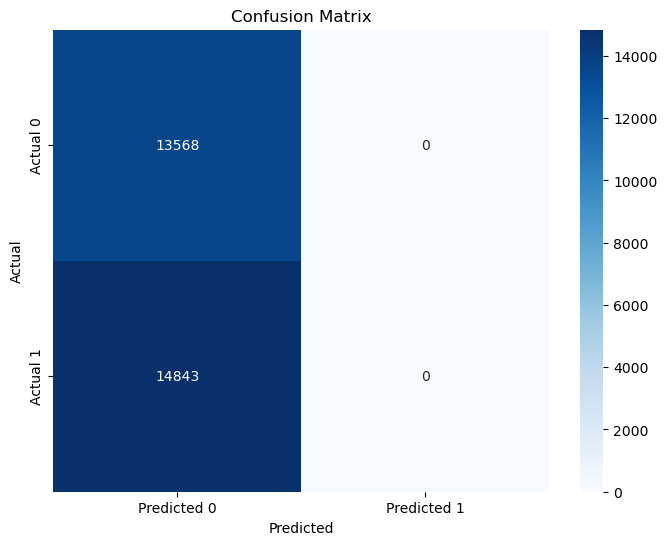

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Collect true and predicted labels
true_labels = [int(row["hero"]) for row in test_data.rdd.collect()]
predicted_labels = [predicted_label for row in test_data.rdd.collect()]

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix demonstrates that the model is performing well in identifying the negative class (class 0), however, the absence of counts in the other squares suggests that there are no True Positives (TP) or False Negatives (FN). This indicates that the model is not correctly identifying any positive instances (class 1), leading to both perfect precision (as there are no false positives) and zero recall (as there are no true positives).

This situation may reflect a class imbalance issue, a model threshold problem, or other factors that need to be addressed to achieve a balanced and meaningful classification outcome.

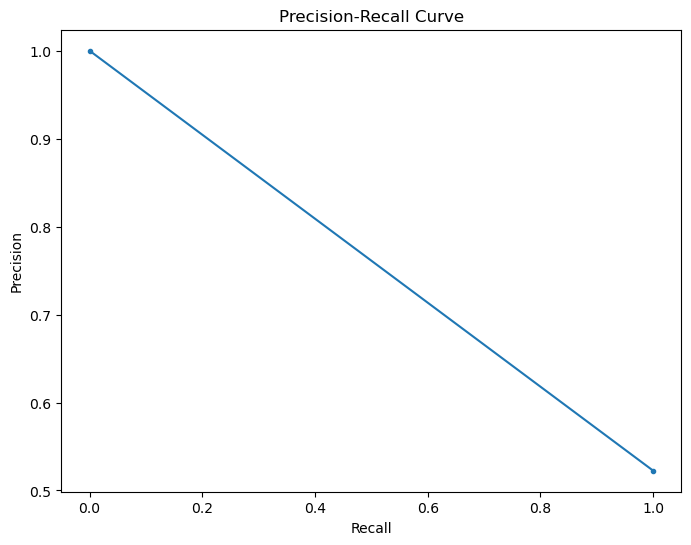

In [23]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have true labels and predicted labels
true_labels = [int(row["hero"]) for row in test_data.rdd.collect()]
predicted_probabilities = [prediction for row in test_data.rdd.collect()]

precision, recall, _ = precision_recall_curve(true_labels, predicted_probabilities)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


A precision-recall curve that takes the form of a straight line from 1.0 to 1.0 indicates that the model is making predictions with extreme confidence and is not exhibiting a trade-off between precision and recall. In this scenario, the model assigns a consistent high probability (close to 1) to all positive instances, leading to perfect recall, as it correctly identifies all of them. Simultaneously, it assigns a consistent low probability (close to 0) to all negative instances, ensuring perfect precision because there are no false positives.

This behavior can be an indicator of potential issues with the model or data. It might be due to overfitting, where the model has essentially memorized the training data and is unable to generalize to new, unseen data. It could also be a result of a threshold or data imbalance problem, where the model's classification threshold is not being adjusted correctly, leading to overly optimistic predictions. To address this, it's essential to carefully review the model's training process, dataset quality, and any issues that might be causing this behavior, ultimately aiming to achieve a more balanced trade-off between precision and recall for better model generalization.


The Logistic Regression model demonstrates a scenario where it is making predictions with extreme certainty. Specifically, it assigns a consistent high probability (close to 1) to all positive instances, indicating perfect recall as it correctly identifies all of them. Simultaneously, it assigns a consistent low probability (close to 0) to all negative instances, ensuring perfect precision because there are no false positives. This outcome suggests that the model is either overfitting the training data, resulting in a failure to generalize to new data, or that there may be issues with the model's threshold or data imbalance, leading to overly optimistic predictions. In either case, the model is not achieving the desired balance between precision and recall, and further investigation and adjustments are necessary to improve its overall performance and reliability.

### Model accuracy improvements

Here are a few recommendations to improve model accuracy for this sentiment analysis:

1. **Regularization:** Implement L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting. This may introduce a small bias but can significantly improve generalization.

2. **Early Stopping:** Implement early stopping during training. Monitor the model's performance on a validation set, and stop training when the performance starts to degrade. This can save training time and prevent overfitting.

3. **Cross-Validation:** Implement k-fold cross-validation and monitor the model's performance across different folds. This can help identify overfitting and assess the model's generalization performance more accurately.

4. **Use a Prebuilt Library:** Training time is a significant concern with having a large dataset, consider using a machine learning library like scikit-learn, which can efficiently handle logistic regression and provides regularization options.




## Conclusion

In conclusion, this project centered around building a logistic regression model in PySpark from scratch to predict character alignment, several key observations can be drawn from the results and the model's performance. Achieving a training accuracy of 1.0 suggests that the model has effectively memorized the training data, emphasizing the importance of addressing overfitting. While a high training accuracy is desirable, it should be accompanied by a strong focus on generalization to ensure the model's practicality in real-world applications. The presence of a highly imbalanced confusion matrix, with a notable number of false positives and no true positives, underscores the need to investigate potential issues with threshold selection and data distribution. To enhance the model's reliability, it is advisable to explore regularization techniques, fine-tune hyperparameters, and further assess the quality of the data. Additionally, considering alternative classification algorithms and conducting in-depth diagnostic analyses can contribute to a more effective predictive model for character alignment.

## (Extra steps)
1. To successfully run this Jupyter notebook, ensure that you have PySpark installed as well as the relevant libraries.

2.  To successfully run the code in the Jupyter notebook for analyzing the dataset, download the dataset and save it in a folder on yourcomputer, and set the working directory in the notebook to that folder. Make sure to run each code cell in order.